Author: Tashay Green

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats
import zipfile 
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# Open the zip folder located in HW5_tg1478 folder. Read the csv file inside.
myzip = zipfile.ZipFile('201506-citibike-tripdata.zip')
myzip.extractall()
myzip.open('201506-citibike-tripdata.csv')
df = pd.read_csv('201506-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [3]:
# Calculating age of riders. Adding new column with ages. 
df['age'] = 2015 - df['birth year'][(df['usertype'] == 'Subscriber')]

In [4]:
# Dropping data that I do not need. Dropping all null values from data. 
df.drop(df.columns[[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14]], axis =1, inplace = True)
df = df.dropna(subset=['age'],how = 'all')
df.head()

,age
0,31.0
1,18.0
2,22.0
3,34.0
5,39.0


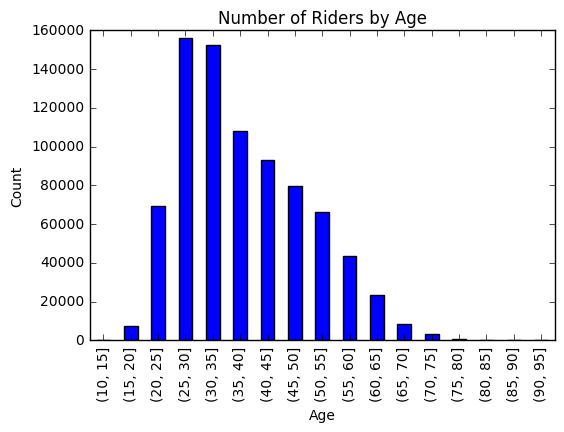

In [5]:
# Plotting the age distributions.
bins = np.arange(10, 99, 5)
ax = df.age.groupby(pd.cut(df.age, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                                legend=False)
ax.set_title("Number of Riders by Age")
ax.set_xlabel('Age')
ax.set_ylabel('Count')

#### Figure 1: Distribution of CitiBike rider ages in June 2015. The curve is positively skewed to the right.

In [6]:
# Creating an empty dictionary to store the age distributions. 
md = {}
md['gaus'] = df.age
print ("Normal mean: %.2f, standard deviation: %.2f"%(md['gaus'].mean(), md['gaus'].std()))

Normal mean: 38.74, standard deviation: 11.47


**The Gaussian distribution does not appear to be a good fit for the rider ages.**

# Statistical Tests for Normal Distribution


## Null Hypothesis: The Gaussian model is a sensible model for the CitiBike rider ages distribution.

## Alternative Hypothesis: The Gaussian model is not a sensible model for the CitiBike rider ages distribution. 

p = 0.05

## KS Test

In [7]:
ks = scipy.stats.kstest(df.age, 'norm')
print (ks)

KstestResult(statistic=1.0, pvalue=0.0)


#### The p-value of 0 is lower than the significance of 0.05, therefore we can reject the Null Hypothesis that claims the Gaussian model is a sensible model for the CitiBike rider ages distribution. 

## Anderson-Darling Test

In [8]:
anderson = scipy.stats.anderson(df.age, 'norm')
print (anderson)

AndersonResult(statistic=11329.465162464767, critical_values=array([ 0.576,  0.656,  0.787,  0.918,  1.092]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


#### The statistic of 11329 is greater than the value at 5% significance, therefore we can reject the Null Hypothesis that claims the Gaussian model is a sensible model for the CitiBike rider ages distribution.

# Statistical Tests for Exponential Distribution


## Null Hypothesis: The Exponential model is a sensible model for the CitiBike rider ages distribution.

## Alternative Hypothesis: The Exponential model is not a sensible model for the CitiBike rider ages distribution. 

p = 0.05

## KS Test

In [9]:
ks = scipy.stats.kstest(df.age,'expon')
print (ks)

KstestResult(statistic=0.99999988746482527, pvalue=0.0)


#### The p-value of 0 is lower than the significance of 0.05, therefore we can reject the Null Hypothesis that claims the Exponential model is a sensible model for the CitiBike rider ages distribution. 

## Anderson-Darling Test

In [10]:
anderson = scipy.stats.anderson(df.age, 'expon')
print (anderson)

AndersonResult(statistic=189837.79916741711, critical_values=array([ 0.922,  1.078,  1.341,  1.606,  1.957]), significance_level=array([ 15. ,  10. ,   5. ,   2.5,   1. ]))


#### The statistic of 189836 is greater than the value at 5% significance, therefore we can reject the Null Hypothesis that claims the Exponential model is a sensible model for the CitiBike rider ages distribution.